In [23]:
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set()  # this makes plots pretty. but it also makes histograms confusing
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import cross_validation as cv

from skll import metrics
from sklearn.metrics import roc_auc_score, make_scorer

from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

import json

import data_utils

In [2]:
train_init = pd.read_csv('../../data/train.csv')
test_init = pd.read_csv('../../data/test.csv')

In [3]:
constant_cols = (train_init.columns[train_init.max() == train_init.min()])

In [4]:
train = train_init.drop(constant_cols, axis=1).drop(['ID'], axis=1)
test = test_init.drop(constant_cols, axis=1)

In [ ]:
roc_scorer = make_scorer(roc_auc_score)

X = train.drop(['TARGET'], axis=1).values
y = train.TARGET.values

rfr = RandomForestRegressor(n_estimators=30, n_jobs=-1)
folds = cv.StratifiedKFold(y, n_folds=2, shuffle=True, random_state=42)
rfecv = RFECV(estimator=rfr, step=25, cv=folds, scoring=roc_scorer)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 135


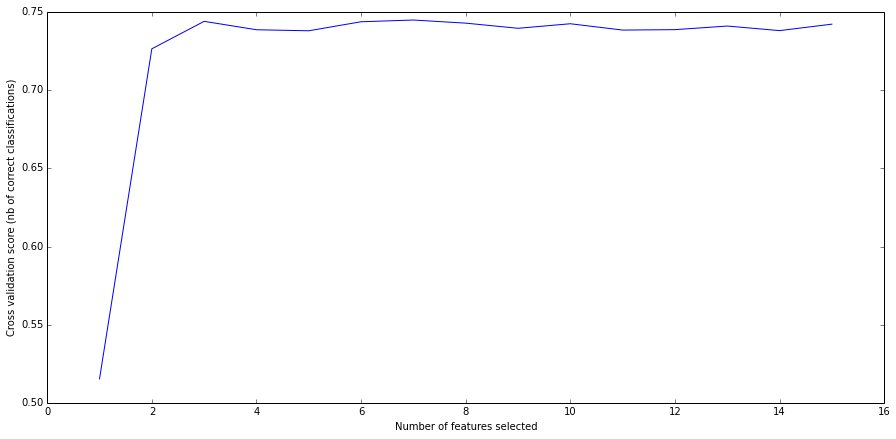

In [5]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,7))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [24]:
json.dump(train.drop(['TARGET'], axis=1).columns[rfecv.support_].tolist(), open('generated/json_dumps/RFECV_important_features.json', 'w'), indent=1)